https://towardsdatascience.com/naive-bayes-document-classification-in-python-e33ff50f937e

In [9]:
import pathlib
import sklearn
import numpy
import nltk
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('train-balanced-sarcasm.csv')
# test_data = pd.read_csv('test-balanced.csv')

In [11]:
#cleaning out empty comments:
empty_comments = data["comment"].isna()
# empty_comments = test_data["comment"].isna()
empty_comments = data[empty_comments].index
# empty_comments = test_data[empty_comments].index
data.drop(empty_comments, axis=0, inplace=True)
# test_data.drop(empty_comments, axis=0, inplace=True)

In [12]:
#split data:
X_train, X_test, y_train, y_test = train_test_split(data["comment"], data["label"],random_state=1)

In [13]:
# from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii' , token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [14]:
# word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
# top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

In [15]:
naive_bayes = MultinomialNB()

naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy score:  0.6545822219759868
Precision score:  0.6481846520583112
Recall score:  0.6729089827483641


###### The accuracy score tells us: out of all of the identifications we made, how many were correct? true positives + true negatives / total observations

###### The precision score tells us: out of all of the ethics identifications we made, how many were correct? true positives / (true positives + false positives)

######  The recall score tells us: out of all of the true cases of ethics, how many did we identify correctly? true positives / (true positives + false negatives)

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

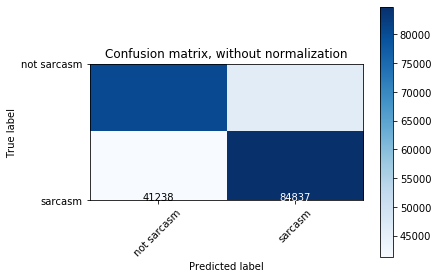

[[80572 46047]
 [41238 84837]]


In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

CATEGORIES = ["not sarcasm","sarcasm"]
cm = confusion_matrix(y_test, predictions)
# sns.heatmap(cm, square=False, annot=True, cmap='RdBu', cbar=False, xticklabels=['not sarcasm', 'sarcasm'], yticklabels=['not sarcasm', 'sarcasm'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')
plt.figure()
plot_confusion_matrix(cm, classes=CATEGORIES, title='Confusion matrix, without normalization')

#Als je hem wel genormaliseerd wil:
# plt.figure()
# plot_confusion_matrix(b_cm, classes=CATEGORIES, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()
print(cm)


In [63]:
# testing_predictions = []
# for i in range(len(X_test)):
#     if predictions[i] == 1:
#         testing_predictions.append('sarcasm')
#     else:
#         testing_predictions.append('not sarcasm')
# check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'abstract':list(X_test)})
# check_df.replace(to_replace=0, value='not sarcasm', inplace=True)
# check_df.replace(to_replace=1, value = 'sarcasm', inplace=True)